## Etude des données disponibles sur le covid dans les hopitaux 

Dans ce travail, on navigue dans les données covid mises à disposition 
par la France. On les présente graphiquement les résultats obtenus.
Le but est d'avoir une vue d'ensemble de l'occupation des différents lits de 
réanimation dans les hopitaux.
Plus tard lorsque l'on en disposera, on les confrontera à l'évolution des opérations de cancers au cours de cette meme période.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Chargement et exploration des données avec des DataFrame  

In [2]:
from google.colab import drive
drive.mount('/drive')


Mounted at /drive


In [3]:
drive_dir = '/drive/MyDrive'
data_dir = drive_dir + '/snds_&_covid/covid'

Dans cette première partie, on va chercher les csv nécessaires usr le site data.gouv.fr

In [4]:
data_1 = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/a1466f7f-4ece-4158-a373-f5d4db167eb0', sep=';', encoding = "ISO-8859-1")

data_0 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/08c18e08-6780-452d-9b8c-ae244ad529b3", sep=';', encoding = "ISO-8859-1")


In [6]:
data_1.tail()

,jour,nomReg,numReg,incid_rea
9535,2021-08-26,Corse,94,3
9536,2021-08-27,Corse,94,0
9537,2021-08-28,Corse,94,2
9538,2021-08-29,Corse,94,1
9539,2021-08-30,Corse,94,3


Pour charger le fichier csv dans un DataFrame pandas:

In [7]:
don_hosp_df = pd.read_csv(data_dir + '/donnees-hospitalieres-classe-age-covid19-2021-08-12-19h09.csv', sep=';')

Regardons les 5 premières lignes: 

In [8]:
don_hosp_df.head(5)

,reg,cl_age90,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
0,1,0,2020-03-18,0,0,NaN,NaN,NaN,0,0
1,1,9,2020-03-18,0,0,NaN,NaN,NaN,0,0
2,1,19,2020-03-18,0,0,NaN,NaN,NaN,0,0
3,1,29,2020-03-18,0,0,NaN,NaN,NaN,0,0
4,1,39,2020-03-18,0,0,NaN,NaN,NaN,0,0


On filtre par region et par 0.
Puis on ne garde que les colonnes reg, jour, hosp, rea, dc


In [9]:
don_hosp_tmp_df = don_hosp_df[don_hosp_df['cl_age90'] == 0]

don_hosp_0_df = don_hosp_tmp_df[['reg', 'jour', 'hosp', 'rea', 'dc']]

In [10]:
don_hosp_0_df.head(20)

,reg,jour,hosp,rea,dc
0,1,2020-03-18,0,0,0
11,2,2020-03-18,16,5,1
22,3,2020-03-18,0,0,0
33,4,2020-03-18,2,2,0
44,6,2020-03-18,0,0,0
55,11,2020-03-18,957,294,36
66,24,2020-03-18,14,5,1
77,27,2020-03-18,168,33,6
88,28,2020-03-18,45,4,3
99,32,2020-03-18,313,87,21


Agrégeons les données par date avant leur représentation

In [11]:
don_hosp_date_df = don_hosp_0_df[['jour', 'hosp', 'rea', 'dc']].groupby(by=["jour"]).sum()

In [12]:
don_hosp_date_df.head()

,hosp,rea,dc
jour,,,
2020-03-18,2972,771,218
2020-03-19,4461,1122,372
2020-03-20,5226,1297,450
2020-03-21,6172,1525,562
2020-03-22,7240,1746,674


In [13]:
don_hosp_date_df.to_csv(data_dir + '/don_hosp_date_df_31082021.csv')

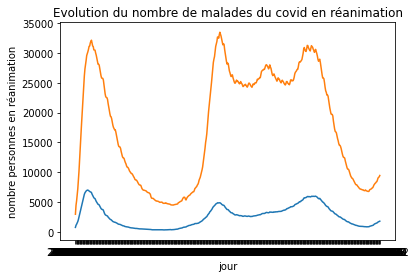

In [14]:
fig, ax = plt.subplots()
ax.plot(don_hosp_date_df['rea']) #, don_hosp_date_df.index())

ax.plot(don_hosp_date_df['hosp']) #, don_hosp_date_df.index())

ax.set(xlabel='jour', ylabel='nombre personnes en réanimation',
       title='Evolution du nombre de malades du covid en réanimation')
#ax.grid()

#fig.savefig("test.png")
plt.show()

Stackplots draw multiple datasets as vertically stacked areas. This is useful when the individual data values and additionally their cumulative value are of interest.

In [15]:
# Recuperation des dates:
l_jours = don_hosp_0_df['jour'].unique()
#l_jours.shape

# Creation du dictionire des regions
l_regions = don_hosp_0_df['reg'].unique()
dic_regions = {}
for region in l_regions[:] :
  reg_df = don_hosp_0_df[don_hosp_0_df['reg'] == region]
  l_rea = reg_df['rea'].to_list()
  dic_regions[region]= l_rea

In [ ]:
dic_regions

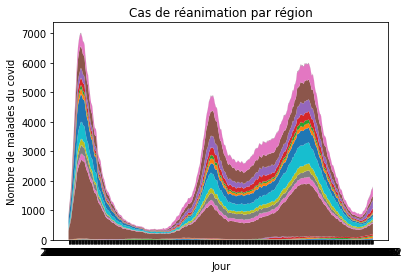

In [ ]:
fig, ax = plt.subplots()
ax.stackplot(l_jours, dic_regions.values(),
             labels=dic_regions.keys())
#ax.legend(loc='upper left')
ax.set_title('Cas de réanimation par région')
ax.set_xlabel('Jour')
ax.set_ylabel('Nombre de malades du covid')

plt.show()

On va maintenant charger les correspondances entre nombres et les noms des régions.

In [17]:
don_incid_reg_df = pd.read_csv(data_dir + '/covid-hospit-incid-reg-2021-08-12-19h09.csv', sep=';', encoding = "ISO-8859-1")

In [18]:
don_incid_reg_df.columns

Index(['jour', 'nomReg', 'numReg', 'incid_rea'], dtype='object')

In [19]:
reg_df = don_incid_reg_df[['numReg','nomReg']].drop_duplicates()

In [ ]:
reg_df.shape

(18, 2)

On fait une jointure pour obtenir le nom des régions

In [21]:
don_hosp_1_df = don_hosp_0_df.join(reg_df.set_index('numReg'), on='reg')

In [22]:
don_hosp_1_df.head()

,reg,jour,hosp,rea,dc,nomReg
0,1,2020-03-18,0,0,0,Guadeloupe
11,2,2020-03-18,16,5,1,Martinique
22,3,2020-03-18,0,0,0,Guyane
33,4,2020-03-18,2,2,0,La Réunion
44,6,2020-03-18,0,0,0,Mayotte


In [23]:
# Creation du dictionire des regions
l_regions_name = don_hosp_1_df['nomReg'].unique()
dic_regions_name = {}
for region in l_regions_name[:] :
  reg_df = don_hosp_1_df[don_hosp_1_df['nomReg'] == region]
  l_rea = reg_df['rea'].to_list()
  dic_regions_name[region]= l_rea

In [25]:
don_hosp_1_df.to_csv(data_dir + '/don_hosp_1_df_31082021.csv')

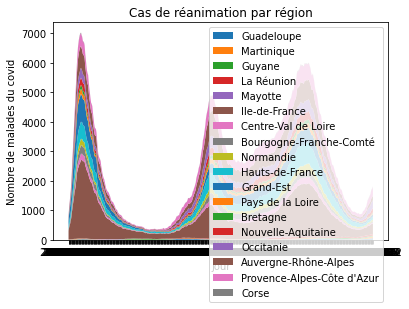

In [24]:
fig, ax = plt.subplots()
ax.stackplot(l_jours, dic_regions_name.values(),
             labels=dic_regions_name.keys())
ax.legend(loc='best')
ax.set_title('Cas de réanimation par région')
ax.set_xlabel('Jour')
ax.set_ylabel('Nombre de malades du covid')

plt.show()